In [3]:
import numpy as np
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
import seaborn as sns
import matplotlib.pyplot as plt

data = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Data/kc_house_data.csv')

df = data.copy()

In [4]:
df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


In [5]:
df.columns

Index(['id', 'date', 'price', 'bedrooms', 'bathrooms', 'sqft_living',
       'sqft_lot', 'floors', 'waterfront', 'view', 'condition', 'grade',
       'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode',
       'lat', 'long', 'sqft_living15', 'sqft_lot15'],
      dtype='object')

In [6]:
x =0
for i in df.columns:
  x +=1
  print(x,i)

1 id
2 date
3 price
4 bedrooms
5 bathrooms
6 sqft_living
7 sqft_lot
8 floors
9 waterfront
10 view
11 condition
12 grade
13 sqft_above
14 sqft_basement
15 yr_built
16 yr_renovated
17 zipcode
18 lat
19 long
20 sqft_living15
21 sqft_lot15


In [8]:
df.isna().sum()
# null value find kare columns ma

id               0
date             0
price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
grade            0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
zipcode          0
lat              0
long             0
sqft_living15    0
sqft_lot15       0
dtype: int64

In [9]:
df.shape

(21613, 21)

In [10]:
df.describe()
# aa function min max count sum 25% etc gote

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,2.161300e+04,2.161300e+04,21613.000000,21613.000000,21613.000000,2.161300e+04,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000
mean,4.580302e+09,5.400881e+05,3.370842,2.114757,2079.899736,1.510697e+04,1.494309,0.007542,0.234303,3.409430,7.656873,1788.390691,291.509045,1971.005136,84.402258,98077.939805,47.560053,-122.213896,1986.552492,12768.455652
std,2.876566e+09,3.671272e+05,0.930062,0.770163,918.440897,4.142051e+04,0.539989,0.086517,0.766318,0.650743,1.175459,828.090978,442.575043,29.373411,401.679240,53.505026,0.138564,0.140828,685.391304,27304.179631
min,1.000102e+06,7.500000e+04,0.000000,0.000000,290.000000,5.200000e+02,1.000000,0.000000,0.000000,1.000000,1.000000,290.000000,0.000000,1900.000000,0.000000,98001.000000,47.155900,-122.519000,399.000000,651.000000
25%,2.123049e+09,3.219500e+05,3.000000,1.750000,1427.000000,5.040000e+03,1.000000,0.000000,0.000000,3.000000,7.000000,1190.000000,0.000000,1951.000000,0.000000,98033.000000,47.471000,-122.328000,1490.000000,5100.000000
50%,3.904930e+09,4.500000e+05,3.000000,2.250000,1910.000000,7.618000e+03,1.500000,0.000000,0.000000,3.000000,7.000000,1560.000000,0.000000,1975.000000,0.000000,98065.000000,47.571800,-122.230000,1840.000000,7620.000000
75%,7.308900e+09,6.450000e+05,4.000000,2.500000,2550.000000,1.068800e+04,2.000000,0.000000,0.000000,4.000000,8.000000,2210.000000,560.000000,1997.000000,0.000000,98118.000000,47.678000,-122.125000,2360.000000,10083.000000
max,9.900000e+09,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,1.000000,4.000000,5.000000,13.000000,9410.000000,4820.000000,2015.000000,2015.000000,98199.000000,47.777600,-121.315000,6210.000000,871200.000000


In [44]:
X = df.iloc[:,3:].values

In [17]:
X.shape

(21613, 18)

In [45]:
y = df.loc[:,'price'].values

In [53]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=2529)


In [54]:
X_train.shape

(15129, 18)

In [55]:
y_test.shape

(6484,)

In [56]:

lr = LinearRegression()

In [57]:
lr.fit(X_train,y_train)

LinearRegression()

In [58]:

lr.coef_


array([-3.18209352e+04,  3.94703962e+04,  1.05308381e+02,  1.63785463e-01,
        5.33064061e+03,  6.49574575e+05,  5.26559592e+04,  2.90338443e+04,
        9.67189984e+04,  6.91952173e+01,  3.61131639e+01, -2.56318119e+03,
        2.11013150e+01, -5.52863195e+02,  6.01990104e+05, -2.07638945e+05,
        2.48524236e+01, -3.35284451e-01])

In [59]:

lr.intercept_

4564101.039441066

In [60]:
pred_value = lr.predict(X_test)

In [61]:
from sklearn.metrics import mean_squared_error

In [62]:
cost = mean_squared_error(y_test,pred_value)

In [63]:
cost

42206639025.820595

In [64]:
pred_value

array([672120.98114182, 492318.59780616, 465028.81276953, ...,
       323220.04581777, 403291.29370535, 458729.8233289 ])

In [65]:
y_test

array([810000., 439950., 536000., ..., 352000., 454950., 475000.])

In [73]:
resdials = y_test - pred_value

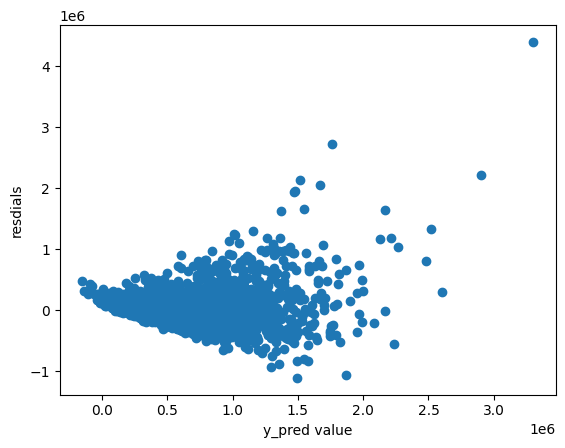

In [77]:
plt.scatter(pred_value,resdials)
plt.xlabel('y_pred value')
plt.ylabel('resdials')
plt.show()

<ipython-input-78-6c19204d0707>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(resdials)


<Axes: ylabel='Density'>

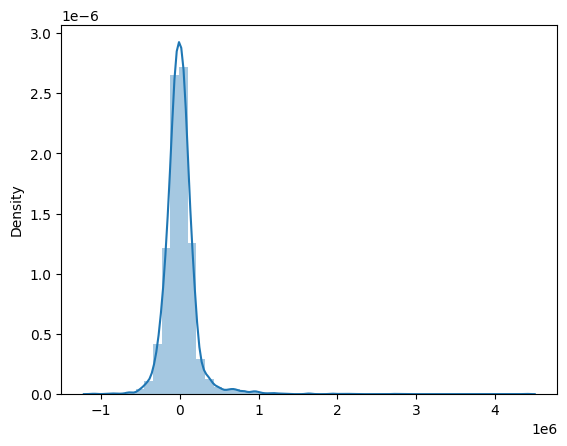

In [78]:
sns.distplot(resdials)

In [79]:
lr = LinearRegression()
from sklearn.metrics import r2_score
class MLR:
  def _init_(self):
    self.coef = None
    self.intercept = None

  def fit(self,X_train,y_train):
    X_train = np.insert(X_train,0,1,axis=1)

#calcuate the coeffs
    betas = np.linalg.inv(np.dot(X_train.T,X_train)).dot(X_train.T).dot(y_train)
    self.intercept_ = betas [0]
    self.coef_ = betas[1:]

  def predict(self,X_test):
    y_pred = np.dot(X_test, self.coef_) + self.intercept_
    return y_pred

lr = MLR()
lr.fit(X_train,y_train)
X_train.shape
np.insert(X_train, 0, 1, axis=1).shape
y_pred = lr.predict(X_test)

r2_score(y_test,y_pred)
print(lr.coef_)
print(lr.intercept_)

[ 1.08563947e+06 -1.10927124e+06  8.75722814e+03  1.80020607e-01
 -8.96391968e+04  1.08906897e+06  1.74146847e+04  9.50231396e+03
  9.84799656e+04 -8.34413060e+03 -8.48056188e+03 -2.56318119e+03
  2.11013150e+01 -5.52863194e+02  6.01990104e+05 -2.07638945e+05
  2.48524236e+01 -3.35284451e-01]
3250390.1903809514
